In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

house = pd.read_csv('kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [96]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [97]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [98]:
house.insert(1,'recent_built',0)
house['recent_built'] = house.apply(lambda x : x['yr_built']
                            if (x['yr_built']>=x['yr_renovated'])
                            else x['yr_renovated'],axis=1)
house.drop(columns= ['yr_built','yr_renovated'])

,id,recent_built,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1955,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650
1,6414100192,1991,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,5631500400,1933,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,2487200875,1965,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,1954400510,1987,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2009,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2014,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2009,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2004,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287


In [99]:
print("\nzipcode describe\n",house['zipcode'].describe())
print("\nlat describe\n",house['lat'].describe())
print("\nlong describe\n",house['long'].describe())


zipcode describe
 count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

lat describe
 count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

long describe
 count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64


In [100]:
corr = house[['price','date','sqft_lot','recent_built','bedrooms','grade','sqft_above','bathrooms','sqft_lot','condition','sqft_living','sqft_basement','floors','view','waterfront','sqft_living15','sqft_lot15']].corr()
corr['price']

price            1.000000
sqft_lot         0.089661
recent_built     0.105755
bedrooms         0.308350
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
sqft_lot         0.089661
condition        0.036362
sqft_living      0.702035
sqft_basement    0.323816
floors           0.256794
view             0.397293
waterfront       0.266369
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

select columns grade,sqft_above,bathrooms, sqft_living, view ,sqft_living15

In [101]:
def find_outlier(data):
    Q1 , Q3 = np.percentile(data,[25,75])
    IQR = Q3 - Q1
    Over_outlier = Q3 + 1.5*IQR
    Low_outlier = Q1 - 1.5*IQR
    location = np.where((data>Over_outlier)|(data<Low_outlier))
    result = [list(location[0]),len(list(location[0]))]
    return result

In [102]:
print("Grade column's Number of Outliers by IQR : " ,find_outlier(house['grade'])[1])
print("\nsqft_above column's Number of Outliers by IQR : " ,find_outlier(house['sqft_above'])[1])
print("\nbathrooms column's Number of Outliers by IQR : " ,find_outlier(house['bathrooms'])[1])
print("\nsqft_living column's Number of Outliers by IQR : " ,find_outlier(house['sqft_living'])[1])
print("\nview column's Number of Outliers by IQR : " ,find_outlier(house['view'])[1])
print("\nsqft_living15 column's Number of Outliers by IQR : " ,find_outlier(house['sqft_living15'])[1])

Grade column's Number of Outliers by IQR :  1911

sqft_above column's Number of Outliers by IQR :  611

bathrooms column's Number of Outliers by IQR :  571

sqft_living column's Number of Outliers by IQR :  572

view column's Number of Outliers by IQR :  2124

sqft_living15 column's Number of Outliers by IQR :  544


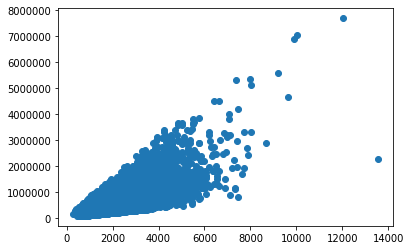

In [103]:
plt.scatter(house['sqft_living'],house['price'])

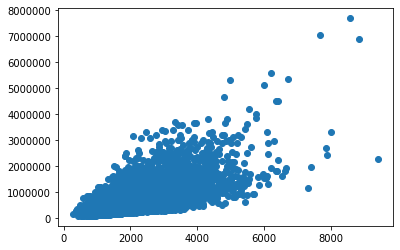

In [104]:
plt.scatter(house['sqft_above'],house['price'])

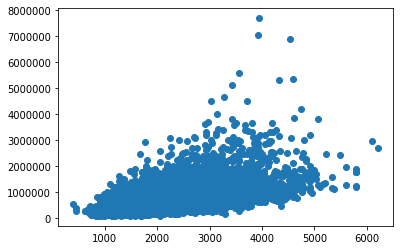

In [105]:
plt.scatter(house['sqft_living15'],house['price'])

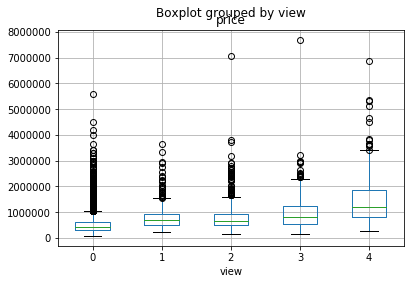

In [106]:
house.boxplot(column=['price'], by='view')

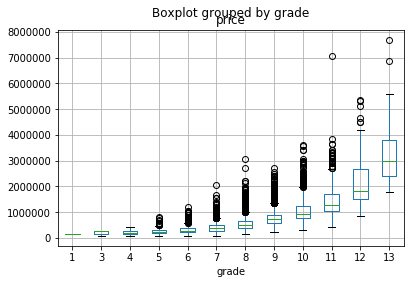

In [107]:
house.boxplot(column=['price'], by='grade')

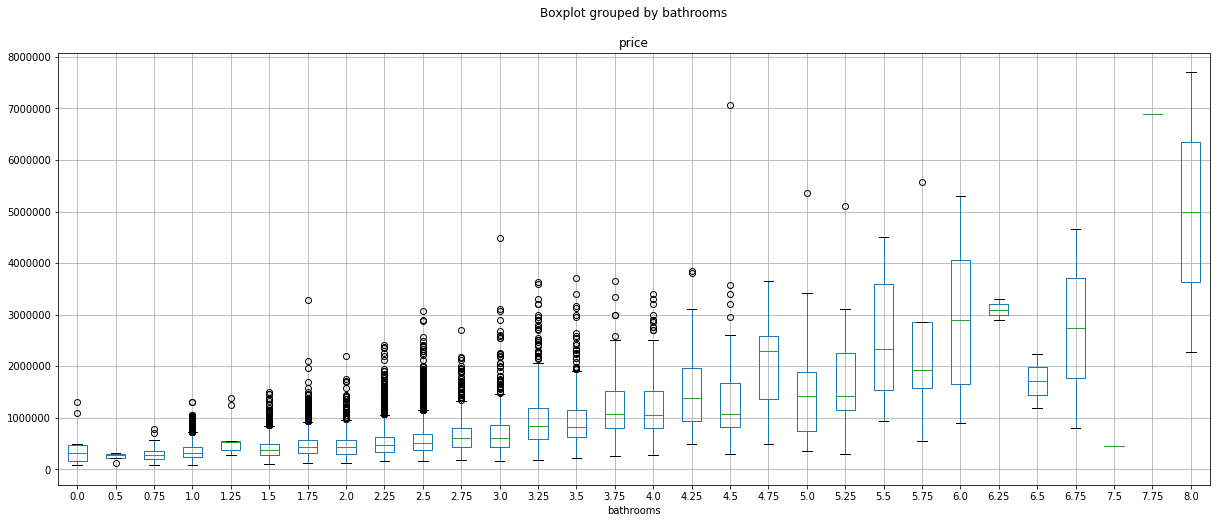

In [108]:
house.boxplot(column=['price'], by='bathrooms',figsize=(20,8))

In [36]:
#number of outliers which is deleted
len(house[house['price']>3500000].index),len(house[house['sqft_living']>8000].index),len(house[house['sqft_above']>7000].index)

(22, 9, 9)

In [37]:
house.drop(house[(house['price']>3000000) & (house['bathrooms']==1.75)|(house['price']>1000000)&(house['bathrooms']==0)].index,inplace=True)
house.drop(house[house['price']>3500000].index,inplace=True)
house.drop(house[house['sqft_living']>8000].index,inplace=True)
house.drop(house[house['sqft_above']>7000].index,inplace=True)

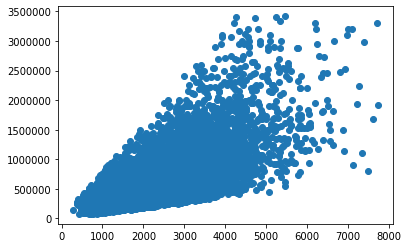

In [38]:
plt.scatter(house['sqft_living'],house['price'])

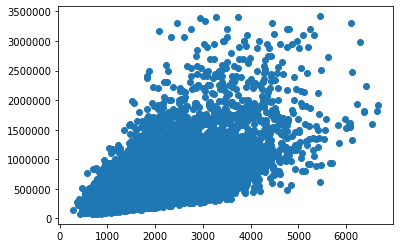

In [39]:
plt.scatter(house['sqft_above'],house['price'])

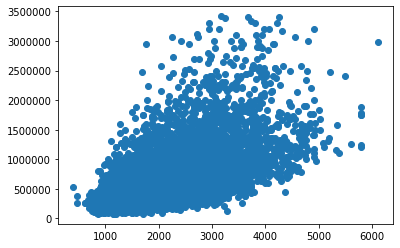

In [40]:
plt.scatter(house['sqft_living15'],house['price'])

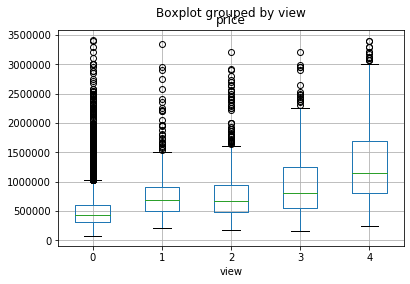

In [41]:
house.boxplot(column=['price'], by='view')

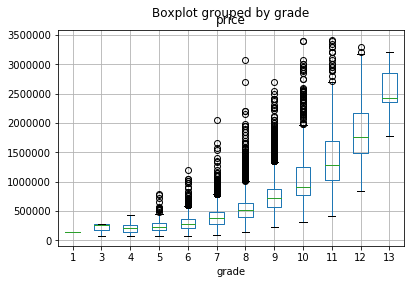

In [43]:
house.boxplot(column=['price'], by='grade')

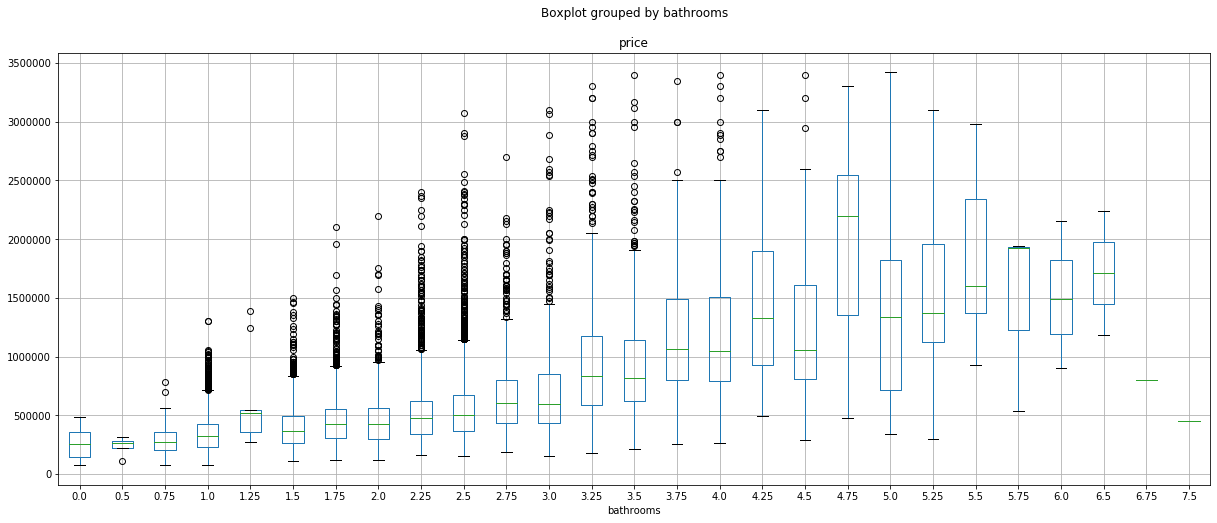

In [42]:
house.boxplot(column=['price'], by='bathrooms',figsize=(20,8))

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('price ~sqft_above+sqft_living15+view+grade+bathrooms',house, return_type = 'dataframe')
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(X.values,i) for i in range(6)]
vif["explanatory variables"] = X.columns
vif

,vif value,explanatory variables
0,64.127336,Intercept
1,3.231861,sqft_above
2,2.555716,sqft_living15
3,1.106683,view
4,2.938565,grade
5,2.088632,bathrooms


In [161]:
import statsmodels.api as sm

X = house[['sqft_above','sqft_living15','view','grade','bathrooms']]
y = house['price']

X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4940.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:16:21   Log-Likelihood:            -2.9937e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21607   BIC:                         5.988e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.617e+05   1.37e+04    -48.432      0.000   -6.88e+05   -6.35e+05
sqft_above       80.1591      3.704     21.643      0.000      72.900      87.419
sqft_living15    48.5349      3.979     12.197      0.000      40.735      56.335
view           1.141e+05   2342.051     48.721      0.000     1.1e+05    1.19e+05
grade          1.139e+05   2488.019     45.790      0.000    1.09e+05    1.19e+05
bathrooms      2.975e+04   3201.413      9.294      0.000    2.35e+04     3.6e+04
==============================================================================
Omnibus:                    18289.768   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1624563.005
Skew:                           3.583   Prob(JB):                         0.00
Kurtosis:                      44.864   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""